In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd

C:\Users\Raphaela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
chats = pd.read_parquet('../02_data/data_archive/raphaela/chats.parquet', engine='pyarrow')
en_domain_stats = pd.read_parquet('../02_data/data_archive/raphaela/en_domain_stats.parquet', engine='pyarrow')
chat_url_shares = np.load('../02_data/data_archive/raphaela/chat_url_shares.npz')

In [3]:
urls = dd.read_parquet('../02_data/data_archive/raphaela/urls.parquet', engine = 'fastparquet') # , engine='pyarrow'

C:\Users\Raphaela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\dask\dataframe\io\parquet\core.py:1241: FutureWarning: The fastparquet engine is deprecated and will be removed in a future release. Please install pyarrow.
  warnings.warn(


In [4]:
urls = urls.compute()

In [5]:
print(urls.head())

   id                                                url          start_date   
0   0    https://odysee.com/@jermwarfare:2/The-Baileys:8 2022-11-02 12:23:51  \
1   1  https://drsambailey.com/its-elementary-my-dear... 2022-10-21 13:34:58   
2   2  https://drsambailey.com/why-nobody-had-caught-... 2022-10-16 11:39:22   
3   3  https://live.childrenshealthdefense.org/shows/... 2022-09-23 00:56:14   
4   4  https://jonrappoport.substack.com/p/the-millio... 2022-09-02 00:49:46   

                    end_date  
0 2023-07-06 06:32:09.670223  
1 2023-07-02 23:53:32.622164  
2 2023-08-29 11:36:47.872883  
3 2023-07-03 12:05:08.872485  
4 2023-07-26 07:43:27.738645  


In [6]:
min_start_date = urls['start_date'].min()
max_start_date = urls['start_date'].max()
min_end_date = urls['end_date'].min()
max_end_date = urls['end_date'].max()

print(f"Min start_date: {min_start_date}")
print(f"Max start_date: {max_start_date}")
print(f"Min end_date: {min_end_date}")
print(f"Max end_date: {max_end_date}")

Min start_date: 2015-09-22 15:41:34
Max start_date: 2023-11-20 09:50:43
Min end_date: 2015-09-22 15:41:34
Max end_date: 2023-11-20 09:50:43


In [11]:
from urllib.parse import urlparse

C:\Users\Raphaela\AppData\Local\Temp\ipykernel_16004\4181828364.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_urls['path'] = subset_urls['url'].apply(extract_path).apply(clean_path)


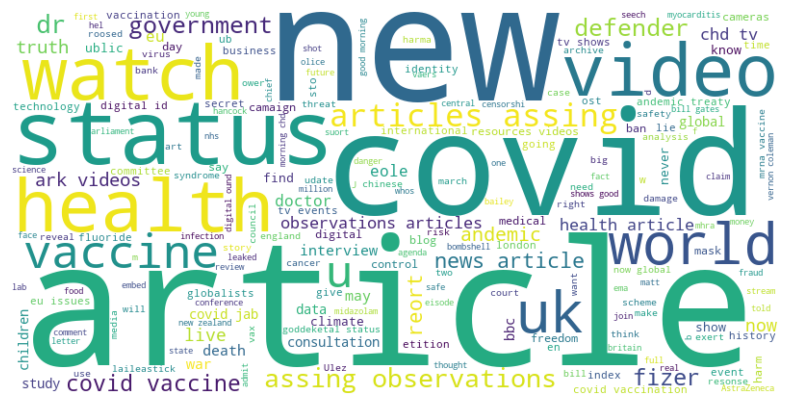

In [15]:
# Function to extract path from a URL
def extract_path(url):
    parsed_url = urlparse(url)
    return parsed_url.path

# Function to clean path
def clean_path(path):
    unwanted_substrings = ['html', 'p']
    for substring in unwanted_substrings:
        path = path.replace(substring, '')
    return path

# Select a subset of the DataFrame (for example, the first 2 rows)
subset_urls = urls.iloc[:1000]

# Extract and clean paths from URLs in the subset
subset_urls['path'] = subset_urls['url'].apply(extract_path).apply(clean_path)

# Combine all paths into a single string
text = ' '.join(subset_urls['path'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

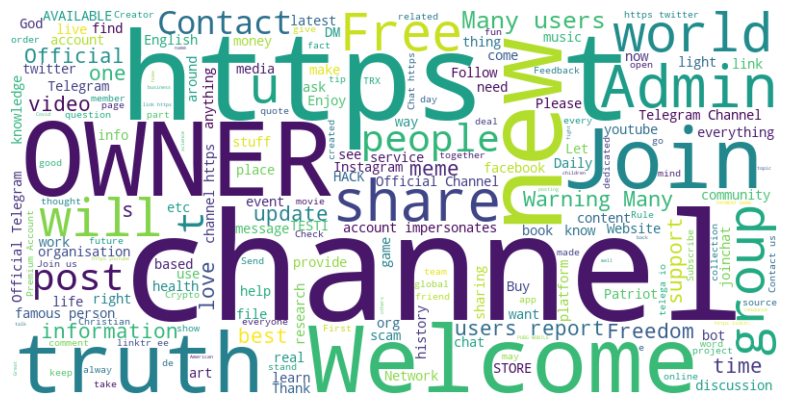

273       "The moral imagination aspires to the apprehen...
279       The aesthetics, history, and happenings of Wes...
348                                 Energy & Infrastructure
364       The Kiffness is an electronic act from Cape To...
542       Subscribe for updates on the case of Prof. Dr....
                                ...                        
436584      Spreading the truth, escaping the mind control.
436585    Join Us to End Government Kidnapping & Traffic...
436759     مثل خودم،شبیه به هیچکس\n\nSince 20 November 2015
436901    🇮🇳 यहाँ आपको सबसे पहले सरकारी नौकरियों की सूचन...
436910    Managed By :- ANY TIME PADHAI MANTRA youtube c...
Name: description, Length: 49412, dtype: object
49412


In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Dropping null values from the 'description' column
non_null_descriptions = chats["description"].dropna()

# Joining all descriptions into a single string
text = " ".join(non_null_descriptions)

# Creating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Printing the non-null descriptions and their count
print(non_null_descriptions)
print(len(non_null_descriptions))

In [8]:
# Print data for each key
for key in chat_url_shares.files:
    print(f"{key}: {chat_url_shares[key]}")

row: [    0   152   817 ... 64980 64980 64980]
col: [       0        0        0 ... 60789531 60789532 60789533]
format: b'coo'
shape: [   65338 60789534]
data: [1 1 1 ... 1 1 1]


In [ ]:
non_null_descriptions = chats["description"].dropna()
print(non_null_descriptions)
print(len(non_null_descriptions))

273       "The moral imagination aspires to the apprehen...
279       The aesthetics, history, and happenings of Wes...
348                                 Energy & Infrastructure
364       The Kiffness is an electronic act from Cape To...
542       Subscribe for updates on the case of Prof. Dr....
                                ...                        
436584      Spreading the truth, escaping the mind control.
436585    Join Us to End Government Kidnapping & Traffic...
436759     مثل خودم،شبیه به هیچکس\n\nSince 20 November 2015
436901    🇮🇳 यहाँ आपको सबसे पहले सरकारी नौकरियों की सूचन...
436910    Managed By :- ANY TIME PADHAI MANTRA youtube c...
Name: description, Length: 49412, dtype: object
49412


In [5]:
M = np.load('../02_data/telegram/telegram/matrix_en.npy')


MemoryError: Unable to allocate 1.50 GiB for an array with shape (200786984,) and data type float64

Subset of the matrix:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  3.  0.  0.  0.  2.  1.
  11.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  1.  0.  1.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  2.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  2.  0.  0.  1.  0.  0.  3.  4.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0

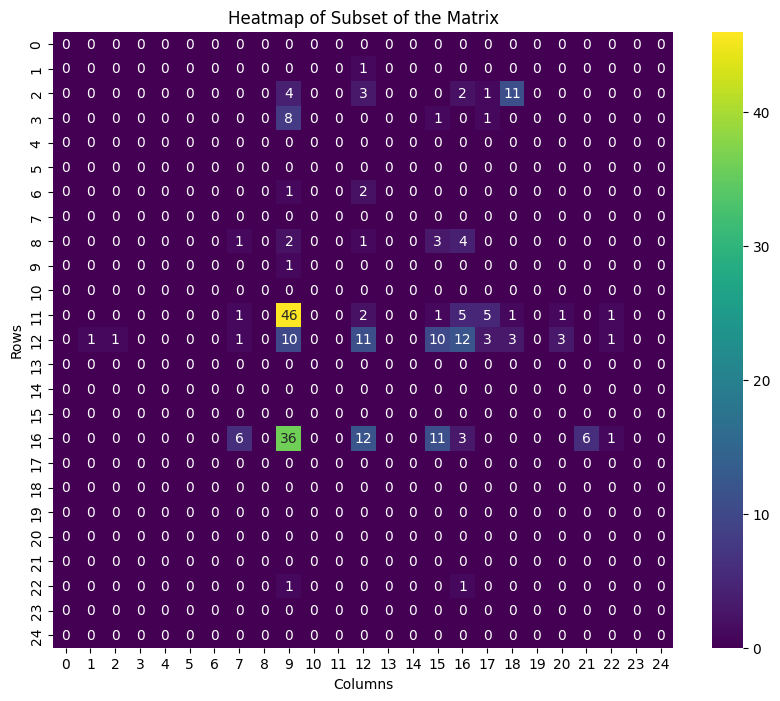

In [19]:
subset = M[:25, :25]
print("Subset of the matrix:\n", subset)

import seaborn as sns 

# Visualize the subset using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset, annot=True, cmap='viridis', cbar=True)
plt.title('Heatmap of Subset of the Matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [ ]:
urls_per_chat = np.sum(M,axis=1)
urls_per_chat[:10]

array([  1.,   2., 189.,  76.,   3.,  10.,  53.,  14., 145.,   1.])

In [32]:
import networkx as nx

# Create a bipartite graph
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
rows, cols = M.shape
B.add_nodes_from(range(rows), bipartite=0)  # Add nodes for one set (e.g., users)
B.add_nodes_from(range(rows, rows + cols), bipartite=1)  # Add nodes for the other set (e.g., messages)

# Add edges between nodes
for i in range(rows):
    for j in range(cols):
        if M[i, j] > 0:  # Assuming positive values indicate an edge
            B.add_edge(i, rows + j)

# Draw the bipartite graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(B)
nx.draw(B, pos, with_labels=True, node_color=['skyblue' if data['bipartite'] == 0 else 'lightgreen' for node, data in B.nodes(data=True)])
plt.title('Bipartite Network Graph')
plt.show()

In [29]:
domain_index = np.load('../02_data/telegram/telegram/domain_index.npy')
domain_index[:25]

array(['drsambailey.com', 'jermwarfare.com', 'yummy.doctor',
       'humanley.com', 'archive.fo', 'terrainthefilm.com',
       'naturalblaze.com', 'expose-news.com', 'bankofengland.co.uk',
       'dailymail.co.uk', 'rockefellerfoundation.org', 'leeds-live.co.uk',
       'childrenshealthdefense.org', '7thchakrafilms.com',
       'zerogeoengineering.com', 'theepochtimes.com', 'brighteon.com',
       'telegraph.co.uk', 'doctors4covidethics.org', 'greenmedinfo.com',
       'off-guardian.org', 'dailyclout.io', 'sky.com',
       'endalldisease.com', 'investors.com'], dtype='<U62')

In [1]:
# Plot the distribution using a histogram
plt.figure(figsize=(12, 6))
plt.hist(urls_per_chat, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of URLs per Chat')
plt.xlabel('Number of URLs')
plt.ylabel('Frequency')
plt.show()

NameError: name 'plt' is not defined

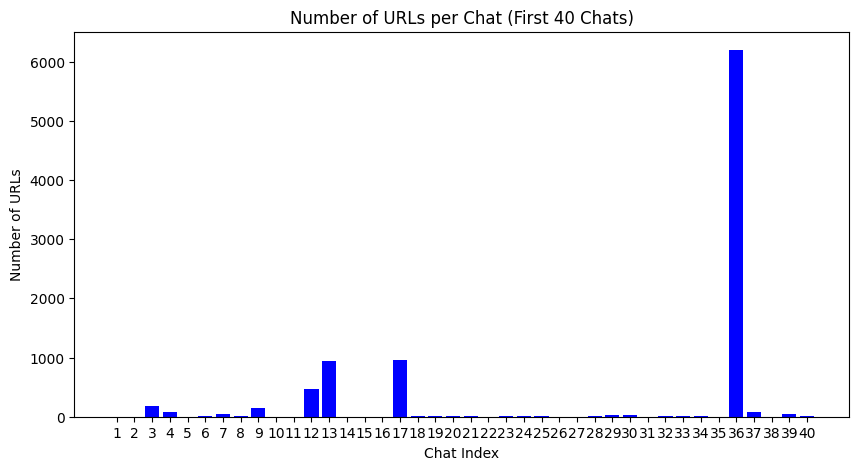

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (Replace this with your actual data)
urls_per_chat = np.sum(M, axis=1)

# Extract the first 10 elements
urls_per_chat_first_10 = urls_per_chat[:40]

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(urls_per_chat_first_10)), urls_per_chat_first_10, color='blue')
plt.xlabel('Chat Index')
plt.ylabel('Number of URLs')
plt.title('Number of URLs per Chat (First 40 Chats)')
plt.xticks(range(len(urls_per_chat_first_10)), range(1, len(urls_per_chat_first_10) + 1))
plt.show()


In [20]:
domain_ratings = pd.read_csv("../02_data/data_archive/raphaela/lasser/domain_ratings.csv")

In [26]:
domain_ratings

,domain,pc1,afm,afm_bias,afm_min,afm_rely,fc,mbfc,mbfc_bias,mbfc_fact,mbfc_min,lewandowsky_acc,lewandowsky_trans,lewandowsky_rely,lewandowsky_mean,lewandowsky_min,misinfome_bin
0,reuters.com,1.000000,0.962600,0.950100,0.950100,0.975100,0.666580,1.0000,1.000000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1
1,apnews.com,0.998049,0.960400,0.933400,0.933400,0.987400,0.666580,1.0000,1.000000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1
2,charitynavigator.org,0.985752,0.929423,0.934419,0.909962,0.920180,0.666580,1.0000,1.000000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1
3,rollcall.com,0.982851,0.916600,0.911500,0.911500,0.921800,0.666580,1.0000,1.000000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1
4,smithsonianmag.com,0.971184,0.891200,0.883200,0.883200,0.899100,0.649188,1.0000,0.996537,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,stormfront.org,0.044752,0.200984,0.137417,0.153307,0.250826,0.055774,0.0556,0.513469,0.0556,0.0556,0.0,0.0,0.0,0.0,0.0,0
11516,pandemic.news,0.043817,0.144205,0.161562,0.153307,0.250980,0.073214,0.0556,0.524943,0.0556,0.0556,0.0,0.0,0.0,0.0,0.0,0
11517,davidicke.com,0.041614,0.144205,0.135754,0.153307,0.250980,0.073214,0.0556,0.524943,0.0556,0.0556,0.0,0.0,0.0,0.0,0.0,0
11518,worldtruth.tv,0.017644,0.138300,0.205700,0.070900,0.070900,0.057333,0.0556,0.513469,0.0556,0.0556,0.0,0.0,0.0,0.0,0.0,0
